# Income Classification using Logistic Regression

1994 US Census database
Logistic regression model to predict whether someone earns more than $50k
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/census+income)

Import Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import scikit-learn tools

In [5]:
# scikit-learn tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

### Loading the dataset

In [6]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

df = pd.read_csv('Data/adult_census.csv',header = None, names = col_names)

print(F"Shape of the dataframe: {df.shape}\n")
columns_list = df.columns.tolist()
print(F'with columns:\n{columns_list}\n')
df.head()

Shape of the dataframe: (32561, 15)

with columns:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#Clean columns by stripping extra whitespace for columns of type "object"
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.strip()

----
&nbsp;
## EDA & Logistic Regression Assumptions

The __outcome__ variable is `income`. Is the dataset imbalanced?

In [8]:
df.income.value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

Create feature dataframe `X`

In [9]:
# All predictor variables are categorical
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week',
                'sex', 'race', 'hours-per-week', 'education']

# Transform to dummy variables
# If 'drop_first=False' (Default) then result is perfectly co-linear features
X = pd.get_dummies(df[feature_cols], drop_first=True)

Check logistic regression assumption: Feature correlation

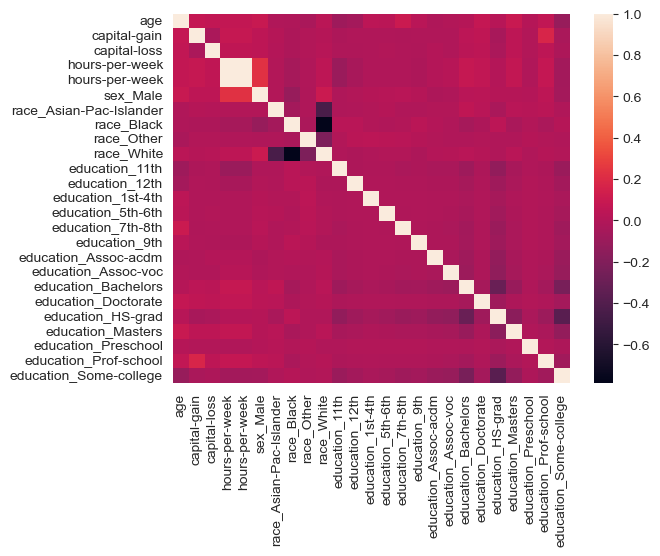

In [10]:
plt.figure()
sns.heatmap(X.corr()),#annot=True
plt.show()

Create binary output variable y
0 when income > $50K, 1 otherwise

In [11]:
df['income'] = df['income'].replace({'<=50K':1,'>50K':0})
y = np.array(df['income'])

----
&nbsp;
## Logistic Regression Models and Evaluation

Split data into train and test set

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

Fit LR model to train set, predicting on the test set

In [13]:
log_reg = LogisticRegression(C=0.05, penalty="l1", solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

print(F"Model Parameters\n\nIntercept: {log_reg.intercept_[0]}\n\nCoefficients:\n{log_reg.coef_}")

Model Parameters

Intercept: 5.617850829272001

Coefficients:
[[-3.68343636e-02 -3.14907225e-04 -6.66537607e-04 -1.96204413e-02
  -1.26083853e-02 -1.03371279e+00  0.00000000e+00  3.36300880e-01
   0.00000000e+00 -9.89407226e-02  5.74084654e-01  0.00000000e+00
   0.00000000e+00  3.99756492e-01  8.96742722e-01  5.01784681e-01
  -5.74103244e-01 -5.48629319e-01 -1.28455988e+00 -1.79935652e+00
   0.00000000e+00 -1.60059623e+00  0.00000000e+00 -1.82438396e+00
  -3.86380217e-01]]


Evaluating the predictions of the model on the test set

In [14]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(F"Confusion Matrix:\n{confusion_matrix}\n")
print(F"Accuracy Score on test set:\n{log_reg.score(x_test, y_test)}")

Confusion Matrix:
[[ 607  880]
 [ 252 4774]]

Accuracy Score on test set:
0.8261937663135268


Create new Dataframe of the model coefficients and variable names:
Sort values based on coefficients

In [15]:
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')
coef_df

,var,coef
23,education_Prof-school,-1.824384
19,education_Doctorate,-1.799357
21,education_Masters,-1.600596
18,education_Bachelors,-1.284560
5,sex_Male,-1.033713
16,education_Assoc-acdm,-0.574103
17,education_Assoc-voc,-0.548629
24,education_Some-college,-0.386380
9,race_White,-0.098941
0,age,-0.036834


Barplot of the coefficients in ascending order

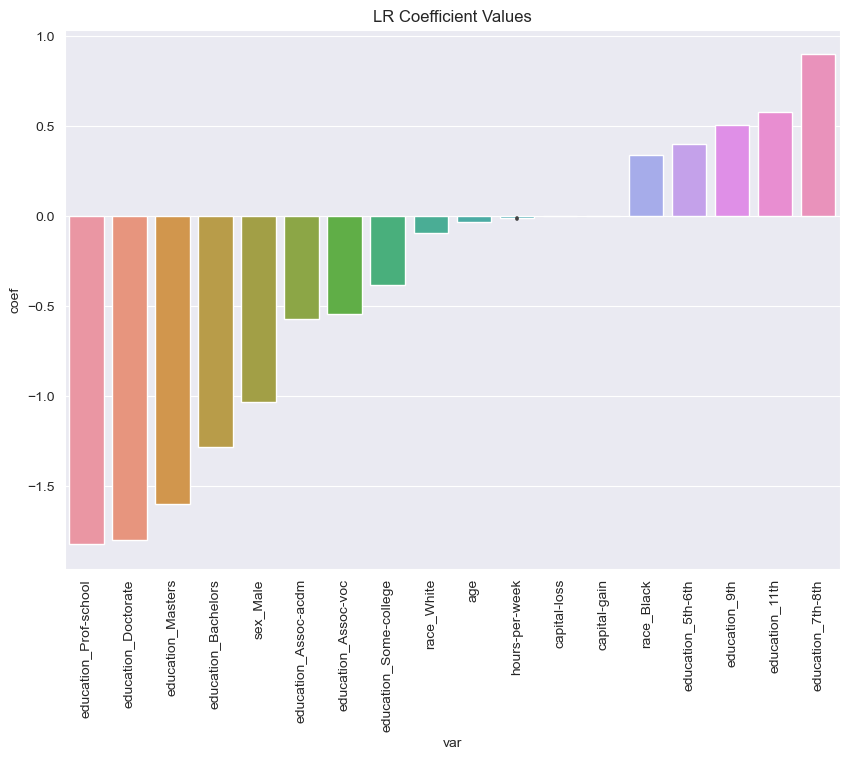

In [16]:
plt.figure(figsize = (10,7))
sns.barplot(data=coef_df, x='var', y='coef')
plt.xticks(rotation=90)
plt.title('LR Coefficient Values')
plt.show()

Plot ROC curve

In [17]:
y_pred_prob = log_reg.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')

ROC AUC score: 0.8457057597734551


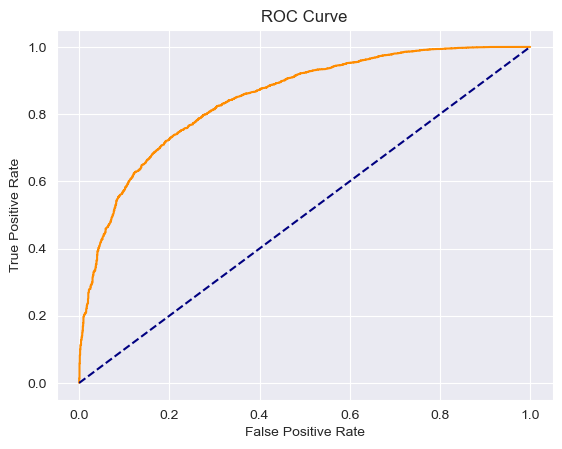

In [18]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.title('ROC Curve')
plt.grid(True)
plt.show()